<img src="image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Cosmetics Sales Data Analysis</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

## Table of Contents
1. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Predictive Modeling](#Predictive-Modeling)
4. [Conclusions and Future Work](#Conclusions-and-Future-Work)

If you find this notebook useful, please upvote it.

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensure matplotlib uses a non-GUI backend
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Set seaborn style for improved visuals
sns.set(style='whitegrid')

## Data Loading and Preprocessing

The cosmetics sales data provides insights into the performance of various products across different regions. This section loads the data from the CSV file, converts the date column into proper datetime format, and performs basic cleaning. It is worth mentioning that an error like 
`[NbConvertApp] WARNING | pattern 'analyst_files/atharvasoundankar/cosmetics-and-skincare-product-sales-data-2022/cosmetics-and-skincare-product-sales-data-2022.ipynb' matched no files`
may be encountered if your export patterns or file paths are misconfigured. Such warnings are common in nbconvert and do not necessarily impact the analysis.

In [2]:
# Load the data from the CSV file
file_path = 'cosmetics_sales_data.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Convert the 'Date' column to datetime format
# Even if the column type is string, inferring it as date provides additional ability to conduct time-based analysis
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # errors='coerce' ensures any invalid date formats become NaT

# Display the first few rows to verify the loaded data
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484


## Exploratory Data Analysis

A keen eye for detail often uncovers subtle trends in sales data. In this section, we will visualize the distribution of the sales amounts, explore product and country distribution, and examine the relationship between numeric features. Even if the data contains only two numeric columns, we use other strategies to explore the data including count plots, histograms, and box plots.

                                Date    Amount ($)  Boxes Shipped
count                            374    374.000000     374.000000
mean   2022-05-04 00:38:30.160427776   7778.353262     249.072193
min              2022-01-01 00:00:00    119.820000      10.000000
25%              2022-03-15 00:00:00   3325.250000     140.000000
50%              2022-05-02 00:00:00   6513.655000     246.000000
75%              2022-06-28 18:00:00  11331.897500     364.000000
max              2022-08-30 00:00:00  23977.480000     499.000000
std                              NaN   5655.378093     144.235296
Sales Person     0
Country          0
Product          0
Date             0
Amount ($)       0
Boxes Shipped    0
dtype: int64


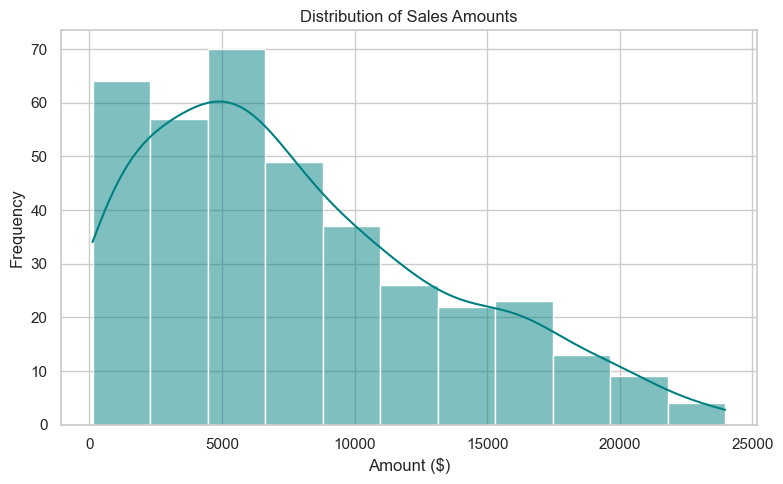

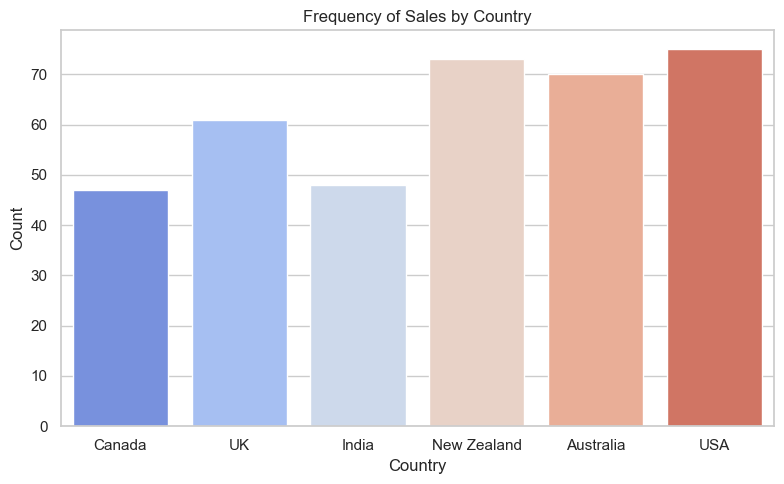

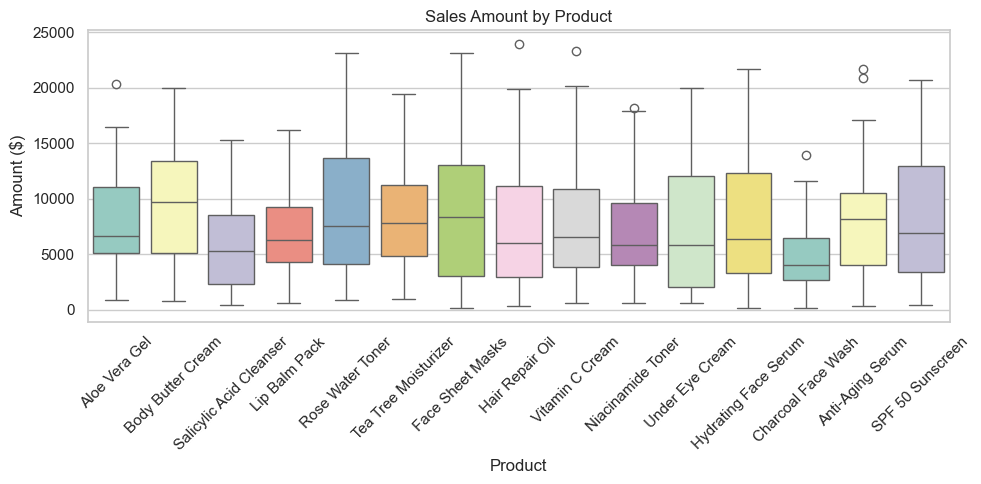

In [3]:
# Basic descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot histogram for the Amount ($)
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount ($)'], kde=True, color='teal')
plt.title('Distribution of Sales Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Count plot for the Country column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Country', palette='coolwarm')
plt.title('Frequency of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Box plot to view the distribution of Amount by Product type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Product', y='Amount ($)', palette='Set3')
plt.title('Sales Amount by Product')
plt.xlabel('Product')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Predictive Modeling

Sales data not only tells us what has happened in the past but can also help forecast future performance. In this section, we create a predictor to classify each transaction as a high-value sale or not. We define a high sale as one where the amount exceeds the median sales amount. We then build a logistic regression model using features such as the number of boxes shipped and encoded categorical variables. Finally, we evaluate the model using accuracy and a confusion matrix.

Predictive Model Accuracy: 83.19%


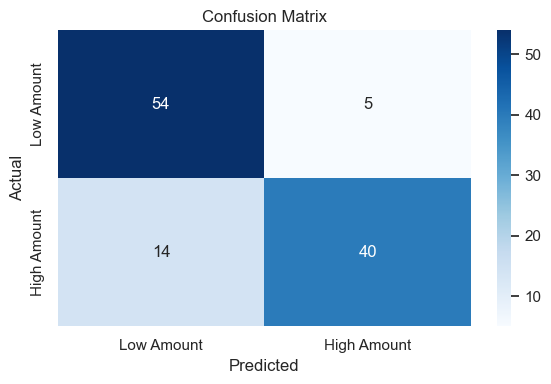

In [4]:
# Create a binary target variable 'HighAmount': 1 if Amount > median, else 0
median_amount = df['Amount ($)'].median()
df['HighAmount'] = (df['Amount ($)'] > median_amount).astype(int)

# For a simple predictor, we'll use 'Boxes Shipped' and one-hot encode categorical features such as 'Country' and 'Product'
features = ['Boxes Shipped', 'Country', 'Product']

# Use get_dummies to handle categorical variables
X = pd.get_dummies(df[features], drop_first=True)
y = df['HighAmount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Model Accuracy: {:.2f}%'.format(accuracy * 100))

# Plotting the confusion matrix using seaborn's heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Amount', 'High Amount'], yticklabels=['Low Amount', 'High Amount'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Conclusions and Future Work

This notebook provided an exploratory analysis of cosmetics sales data. We performed data cleaning, visualized various aspects of the data, and implemented a simple predictive model to classify high-value sales transactions. 

Merits of our approach include:
- Careful conversion of data types, especially inferring the date from string data for time series analysis.
- Use of various visualizations which provide both immediate insights and a foundation for deeper analysis.
- Building a preliminary predictive model that can be enhanced with more features and advanced algorithms.

Future work could explore:
- Incorporating additional features related to the timing of sales for time series forecasting.
- Using more sophisticated models or ensemble methods to improve prediction accuracy.
- A detailed error analysis to resolve issues during notebook conversion (as observed with nbconvert warnings) which are often related to file pattern matching rather than errors in data processing.

Thank you for reviewing this analysis. If you found it useful, please consider upvoting it.